In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/testing_data.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.grade = df.grade.astype('category')
df.grade = df.grade.cat.reorder_categories(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
                                                '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
df.condition = df.condition.astype('category')
df.condition = df.condition.cat.reorder_categories(['Fair', 'Poor', 'Average',
                                                        'Good', 'Very Good'])
df.view = df.view.astype('category')
df.view = df.view.cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])

In [5]:
df.view = df.view.cat.codes
df.grade = df.grade.cat.codes
df.condition =df.condition.cat.codes

In [6]:
cities = {'Algona': [98001], 'Auburn': [98001, 98002, 98003, 98023, 98063, 98071, 98092, 98093], 'Federal Way': [98001, 98003, 98023, 98063, 98093],
         'Beaux Arts Village': [98004], 'Bellevue':[98004, 98005, 98006, 98007, 98008, 98009, 98015], 
          'Clyde Hill': [98004], 'Hunts Point': [98004], 'Yarrow Point': [98004], 'Black Diamond': [98010],
         'Bothell': [98011, 98041, 98028], 'Burton': [98013], 'Vashion': [98013], 'Carnation': [98014],
         'Duvall':[98019], 'Enumclaw': [98022], 'Fall City': [98024], 'Hobart': [98025], 
         'Issaquah': [98027], 'Kent': [98030, 98031, 98032, 98035, 98042, 98064], 'Kirkland':[98033, 98034, 98083],
         'Maple Valley': [98038], 'Medina': [98039], 'Mercer Island': [98040], 'Kenmore': [98028],
         'Covington':[98042], 'North Bend': [98045], 'Pacific':[98047], 'Preston':[98050],
         'Ravensdale':[98051], 'Redmond': [98052, 98053, 98073, 98074], 'Redondo': [98054], 'Renton': [98055, 98056, 98057, 98058, 98059],
         'Newcastle': [98056, 98059,], 'Seahurst':[98062], 'Snoqualmie': [98065, 98068], 'Snoqualmie Pass': [98068],
         'Vashon': [98070], 'Woodinville': [98072], 'Sammamish':[98075, 98075], 'Issaquah': [98075, 98027, 98029],
         'Seattle': [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 
                     98126, 98131, 98132, 98133, 98134, 98136, 98138, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160, 98161, 98164, 98166, 98168, 98171, 98174, 98177, 98178, 98188, 98198, 98199 ], 
          'Tukwila': [98108, 98138, 98168, 98178, 98188],
         'Shoreline': [98133, 98155, 98177 ], 'Burien': [98146, 98148, 98166, 98168 ], 'Des Moines' : [98148, 98198], 'Normandy Park': [98148, 98166, 98198], 'Seatac': [98148, 98158, 98168, 98188, 98198], 
          'Lake Forest Park': [98155, 98155, 98155], 'Baring': [98224], 'Skykomish': [98288]}

In [7]:
data = {}

for i in cities.keys():
    if i in df.columns:
        data[i] = df[df[i] == 1]
    else:
        continue

In [8]:
data.keys()

dict_keys(['Algona', 'Auburn', 'Federal Way', 'Beaux Arts Village', 'Bellevue', 'Clyde Hill', 'Hunts Point', 'Yarrow Point', 'Black Diamond', 'Bothell', 'Carnation', 'Duvall', 'Enumclaw', 'Fall City', 'Issaquah', 'Kent', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island', 'Kenmore', 'Covington', 'North Bend', 'Redmond', 'Renton', 'Newcastle', 'Snoqualmie', 'Vashon', 'Woodinville', 'Sammamish', 'Seattle', 'Tukwila', 'Shoreline', 'Burien', 'Des Moines', 'Normandy Park', 'Seatac', 'Lake Forest Park'])

In [9]:
df.columns
outliers = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
           'has_basement', 'recently_renovated']

In [10]:
for i in data.keys():
    print("{}".format(i))
    print(data[i].loc[:, outliers].describe())
    print('       ')

Algona
               price    bedrooms   bathrooms  sqft_living       sqft_lot  \
count     361.000000  361.000000  361.000000   361.000000     361.000000   
mean   281194.869806    3.393352    2.011773  1903.783934   14967.002770   
std     98837.430520    0.726758    0.609274   653.794856   21213.757025   
min    100000.000000    1.000000    0.750000   770.000000    2064.000000   
25%    215000.000000    3.000000    1.500000  1440.000000    7245.000000   
50%    260000.000000    3.000000    2.000000  1824.000000    9292.000000   
75%    320000.000000    4.000000    2.500000  2240.000000   14439.000000   
max    850000.000000    6.000000    3.500000  5440.000000  239580.000000   

           floors  waterfront        view   condition       grade  \
count  361.000000       361.0  361.000000  361.000000  361.000000   
mean     1.430748         0.0    0.094183    2.321330    4.296399   
std      0.490942         0.0    0.507712    0.620765    0.874461   
min      1.000000         0.0   

In [11]:
df.lat, df.long

(0        47.5112
 1        47.7210
 2        47.7379
 3        47.5208
 4        47.6168
           ...   
 21394    47.6993
 21395    47.5107
 21396    47.5944
 21397    47.5345
 21398    47.5941
 Name: lat, Length: 21399, dtype: float64,
 0       -122.257
 1       -122.319
 2       -122.233
 3       -122.393
 4       -122.045
           ...   
 21394   -122.346
 21395   -122.362
 21396   -122.299
 21397   -122.069
 21398   -122.299
 Name: long, Length: 21399, dtype: float64)

In [12]:
from math import cos, sin, atan2, sqrt, pi

def center_geolocation(geolocations):
    """
    Provide a relatively accurate center lat, lon returned as a list pair, given
    a list of list pairs.
    ex: in: geolocations = ((lat1,lon1), (lat2,lon2),)
        out: (center_lat, center_lon)
    """
    x = 0
    y = 0
    z = 0

    for lat, lon in geolocations:
        lat = float(lat *(pi/180))
        lon = float(lon * (pi/180))
        x += cos(lat) * cos(lon)
        y += cos(lat) * sin(lon)
        z += sin(lat)

    x = float(x / len(geolocations))
    y = float(y / len(geolocations))
    z = float(z / len(geolocations))
    
    degrees1 = atan2(z, sqrt(x * x + y * y))
    degrees2 = atan2(y, x)

    return (degrees1 * (180/pi), degrees2 *(180/pi))

In [13]:
coordinates = {}

for i in data.keys():
    x = data[i]['lat']
    y = data[i]['long']
    pair = list(zip(x,y))
    
    coordinates[i] = pair
    
    

    

In [14]:
center_location = {}

for i in data.keys():
    center_location[i] = center_geolocation(coordinates[i])

In [15]:
for i in center_location.keys():
    print('{} : {}'.format(i, center_location[i]))

Algona : (47.309106343981384, -122.27070044933522)
Auburn : (47.30854005572448, -122.27676582103697)
Federal Way : (47.31053224165728, -122.32132927351802)
Beaux Arts Village : (47.61618382660613, -122.20518721213311)
Bellevue : (47.59390218225879, -122.15570714644898)
Clyde Hill : (47.61618382660613, -122.20518721213311)
Hunts Point : (47.61618382660613, -122.20518721213311)
Yarrow Point : (47.61618382660613, -122.20518721213311)
Black Diamond : (47.333218058574275, -121.99947283065683)
Bothell : (47.75516310891853, -122.22772946271448)
Carnation : (47.671627810177164, -121.84858639209433)
Duvall : (47.737109204433516, -121.95483585247658)
Enumclaw : (47.21123075623288, -121.99554880772615)
Fall City : (47.55876680494093, -121.90547261010268)
Issaquah : (47.55445770524799, -122.02523399866831)
Kent : (47.375893695872826, -122.16518645535287)
Kirkland : (47.70273832807398, -122.19865397295318)
Maple Valley : (47.370642044726864, -122.03175526548821)
Medina : (47.6258401004965, -122.233

In [16]:
center_location.pop('Clyde Hill')
center_location.pop('Hunts Point')
center_location.pop('Yarrow Point')


(47.61618382660613, -122.20518721213311)

In [17]:
for i in data.keys():
    print('{} : {}'.format(i, len(data[i])))

Algona : 361
Auburn : 1690
Federal Way : 1140
Beaux Arts Village : 317
Bellevue : 1407
Clyde Hill : 317
Hunts Point : 317
Yarrow Point : 317
Black Diamond : 100
Bothell : 478
Carnation : 124
Duvall : 190
Enumclaw : 233
Fall City : 80
Issaquah : 1092
Kent : 1201
Kirkland : 977
Maple Valley : 589
Medina : 50
Mercer Island : 282
Kenmore : 283
Covington : 547
North Bend : 220
Redmond : 1418
Renton : 1597
Newcastle : 874
Snoqualmie : 308
Vashon : 117
Woodinville : 273
Sammamish : 359
Seattle : 8973
Tukwila : 853
Shoreline : 1194
Burien : 868
Des Moines : 337
Normandy Park : 591
Seatac : 742
Lake Forest Park : 446


In [18]:
regions_df = {}

regions_df['Southwest'] = df[(df['Federal Way'] == 1) | (df['Auburn'] == 1) | (df['Algona'] == 1)]
regions_df['Southeast'] = df[(df['Enumclaw'] == 1) | (df['Black Diamond'] == 1) | (df['Maple Valley'] == 1) | 
                             (df['Covington'] == 1) | (df['Kent'] == 1)]
regions_df['Island'] = df[df['Vashon'] == 1]

regions_df['South_of_Seattle'] = df[(df['Des Moines'] == 1) | (df['Normandy Park'] == 1) | (df['Seatac'] == 1) | 
                             (df['Burien'] == 1) | (df['Tukwila'] == 1)]
regions_df['Seattle'] = df[df['Seattle'] == 1]
regions_df['Southeast_of_Seattle'] = df[(df['Renton'] == 1) | (df['Newcastle'] == 1)]
regions_df['Rich'] = df[(df['Mercer Island'] == 1) | (df['Bellevue'] == 1) | (df['Beaux Arts Village'] == 1) | 
                             (df['Medina'] == 1)]
regions_df['Kirkland'] = df[df['Kirkland'] == 1]
regions_df['Northeast'] = df[(df['Kenmore'] == 1) | (df['Bothell'] == 1) | (df['Woodinville'] == 1)]
regions_df['North'] = df[(df['Shoreline'] == 1) | (df['Lake Forest Park'] == 1)]
regions_df['Redmond'] = df[df['Redmond'] == 1]
regions_df['Suburan'] = df[(df['Sammamish'] == 1) | (df['Issaquah'] == 1)]
regions_df['Rural'] = df[(df['Duvall'] == 1) | (df['Carnation'] == 1) | (df['Fall City'] == 1) | 
                             (df['Snoqualmie'] == 1) | (df['North Bend'] == 1)]


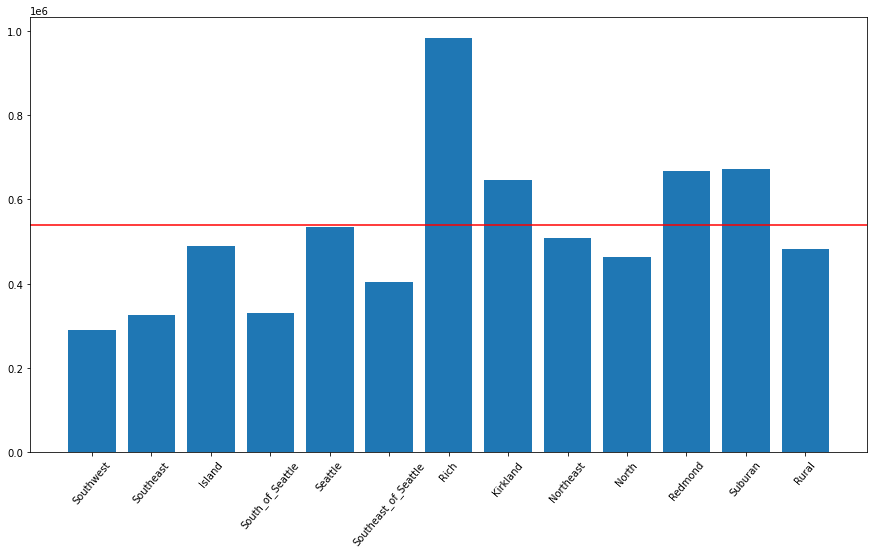

In [19]:
mean_prices = []

for i in regions_df.keys():
    mean_prices.append(regions_df[i]['price'].mean())
    
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(list(range(len(mean_prices))), mean_prices)
ax.set_xticks(list(range(len(mean_prices))))
ax.set_xticklabels(regions_df.keys(), rotation=50)
ax.axhline(y = df.price.mean(), color = 'r', linestyle = '-')

plt.show()

This is : Southwest


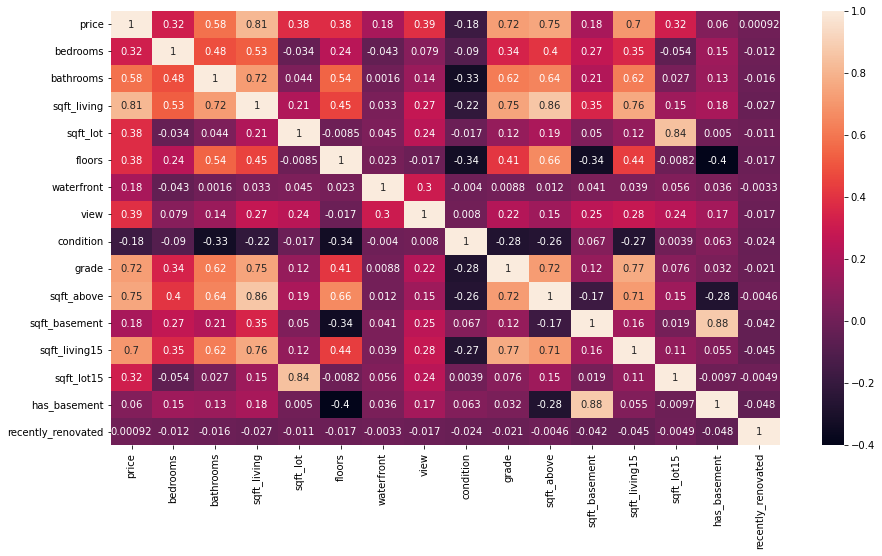

This is : Southeast


<Figure size 432x288 with 0 Axes>

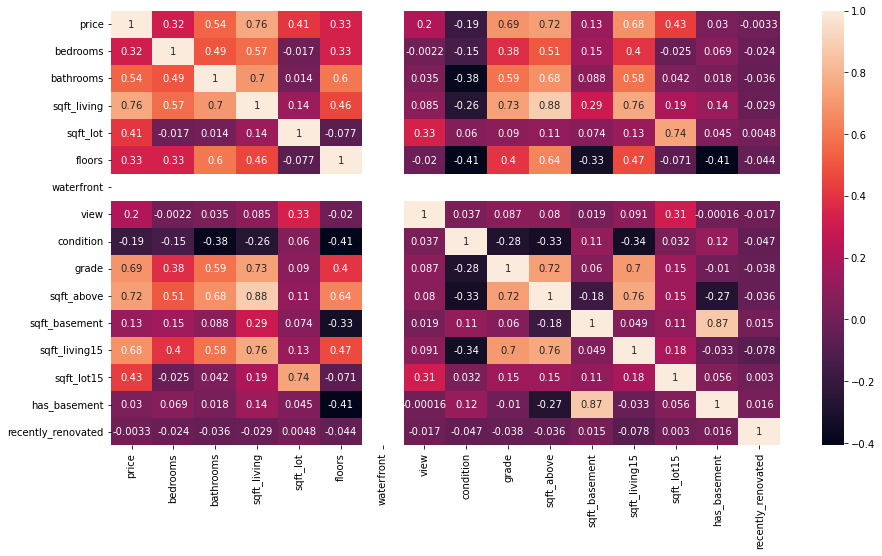

This is : Island


<Figure size 432x288 with 0 Axes>

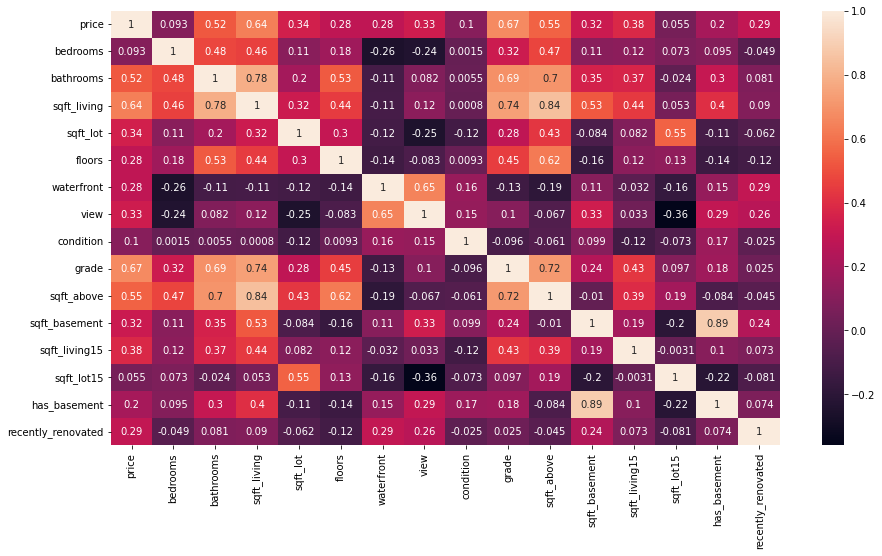

This is : South_of_Seattle


<Figure size 432x288 with 0 Axes>

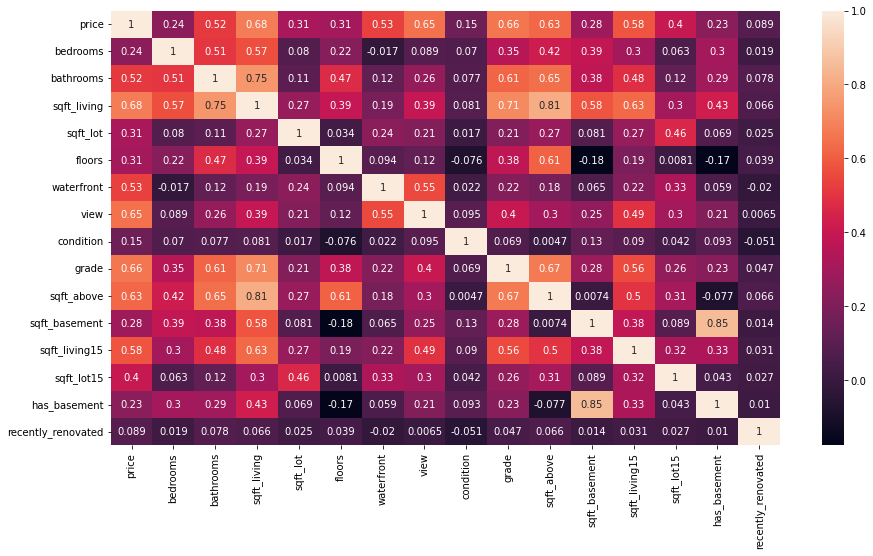

This is : Seattle


<Figure size 432x288 with 0 Axes>

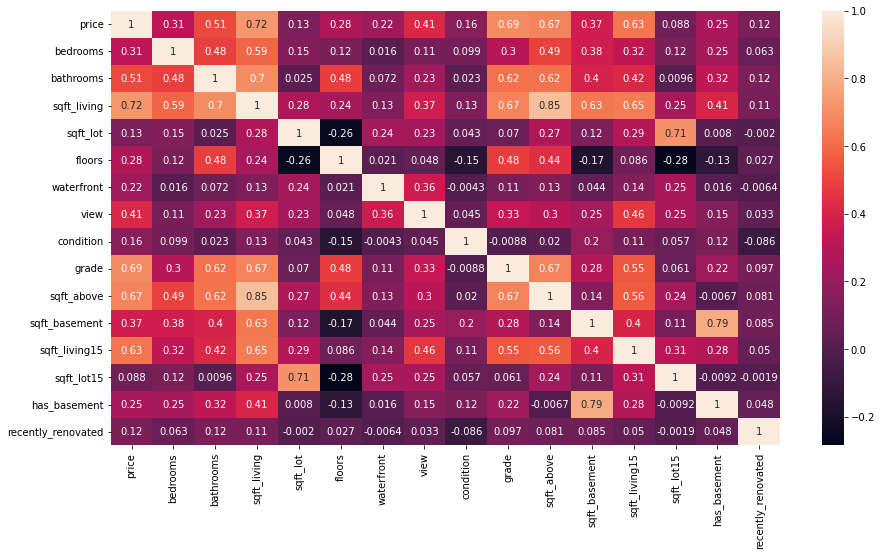

This is : Southeast_of_Seattle


<Figure size 432x288 with 0 Axes>

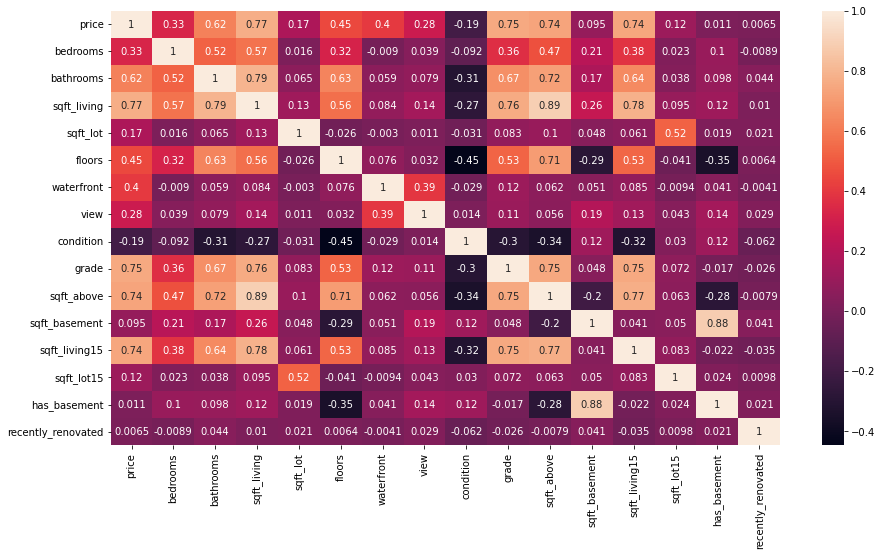

This is : Rich


<Figure size 432x288 with 0 Axes>

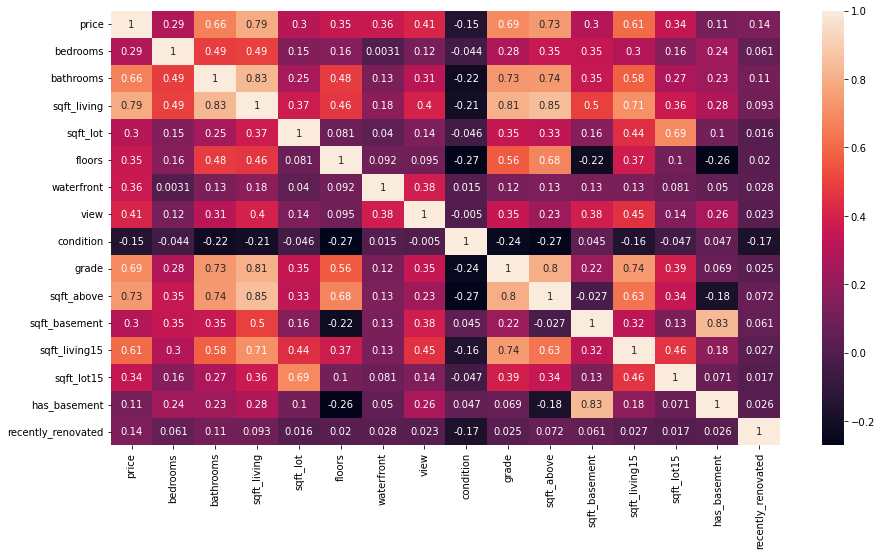

This is : Kirkland


<Figure size 432x288 with 0 Axes>

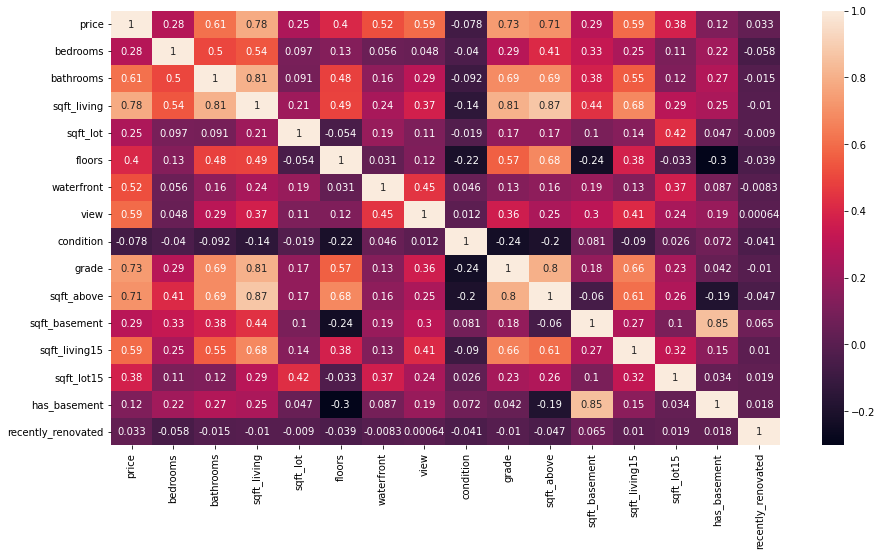

This is : Northeast


<Figure size 432x288 with 0 Axes>

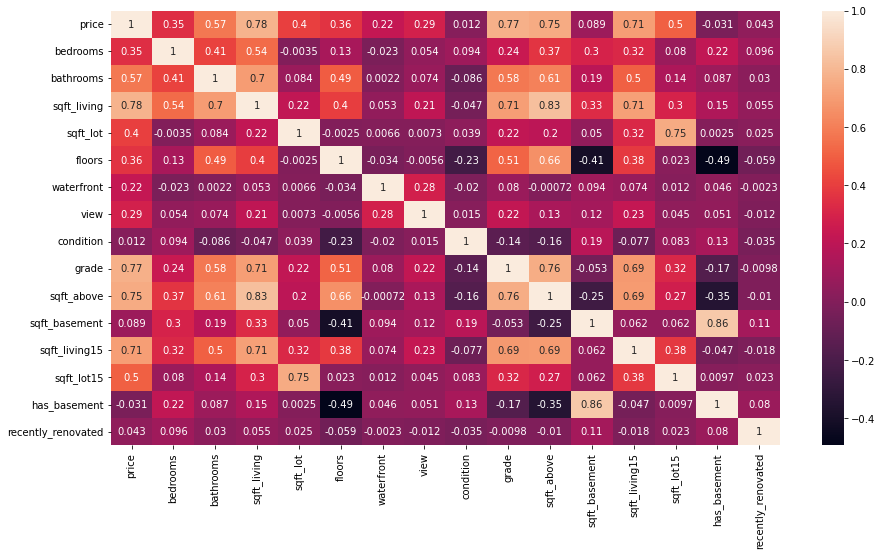

This is : North


<Figure size 432x288 with 0 Axes>

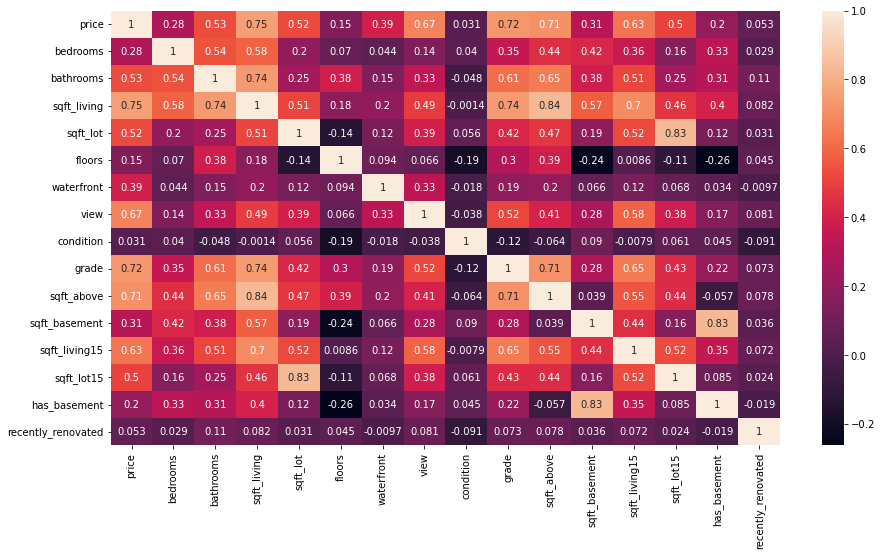

This is : Redmond


<Figure size 432x288 with 0 Axes>

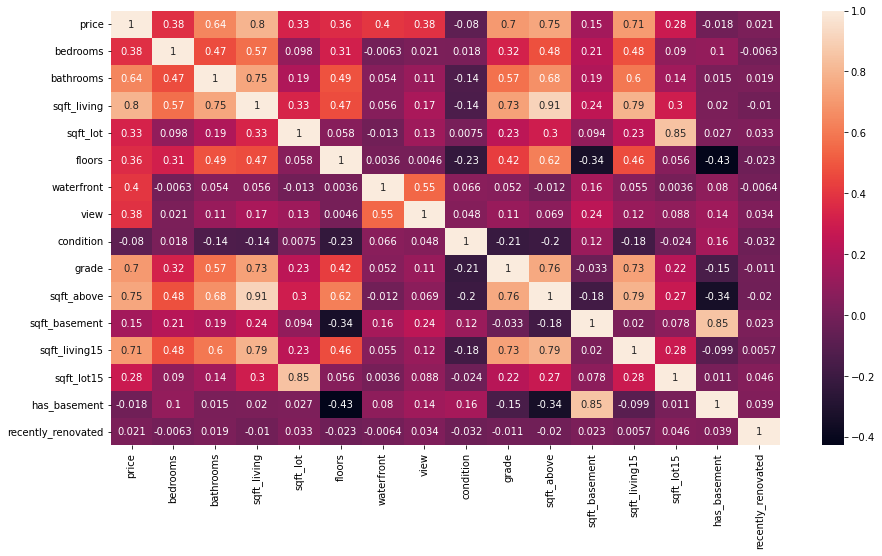

This is : Suburan


<Figure size 432x288 with 0 Axes>

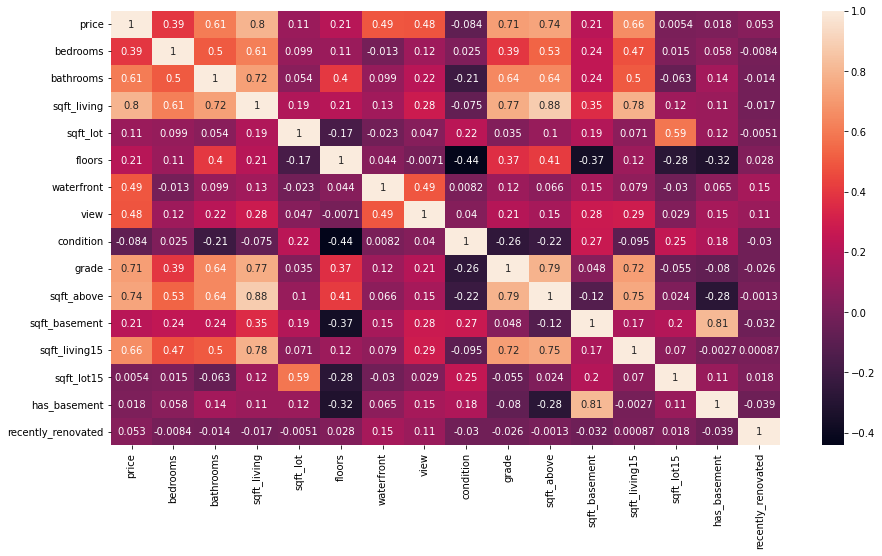

This is : Rural


<Figure size 432x288 with 0 Axes>

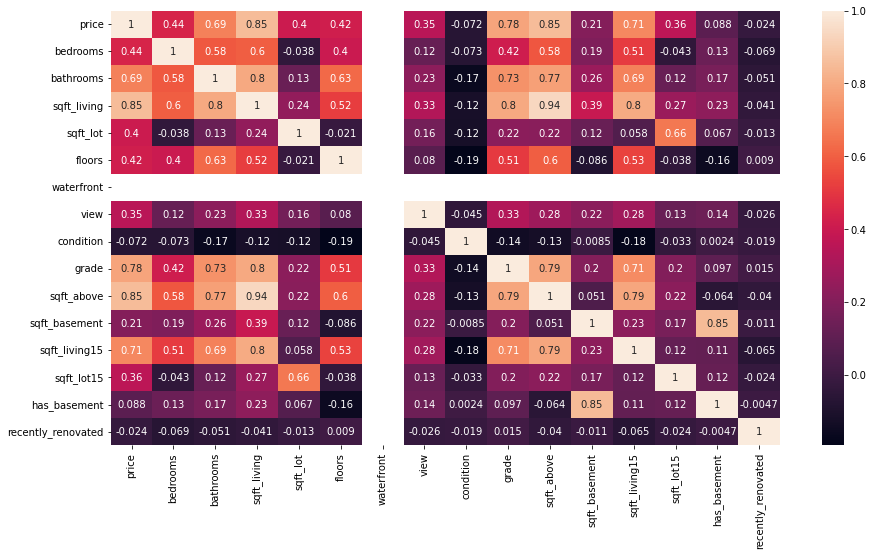

<Figure size 432x288 with 0 Axes>

In [20]:
for i in regions_df.keys():
    corr = regions_df[i].loc[:, outliers].corr()
    fig = plt.subplots(figsize=(15,8))
    print('This is : {}'.format(i))
    sns.heatmap(corr, annot=True)
    plt.show()
    plt.clf()

# Heatmap before outlier treatment

In [21]:
for i in regions_df.keys():
    for x in outliers:    
        
        data = regions_df[i][x]

        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        regions_df[i][x] = np.where(data > upper, upper, data)
        regions_df[i][x] = np.where(data < lower, lower, data)

# Outlier treatment

This is : Southwest


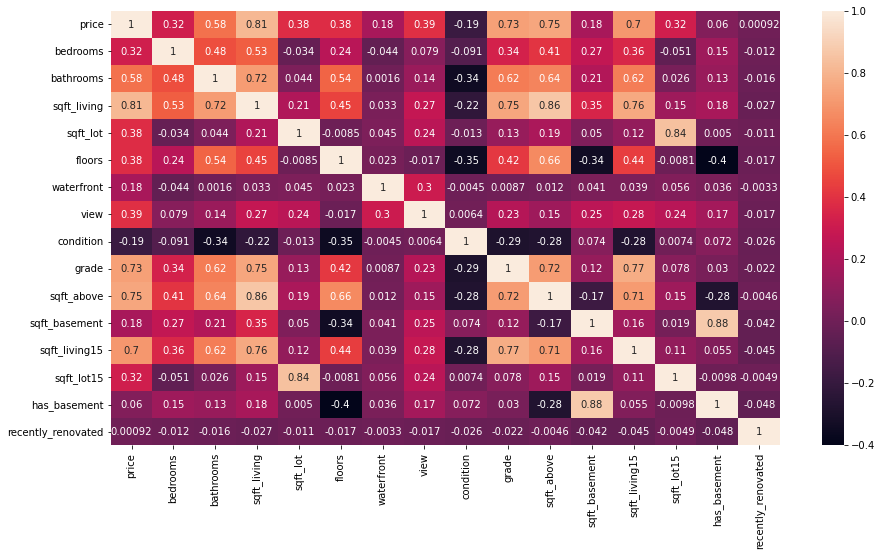

This is : Southeast


<Figure size 432x288 with 0 Axes>

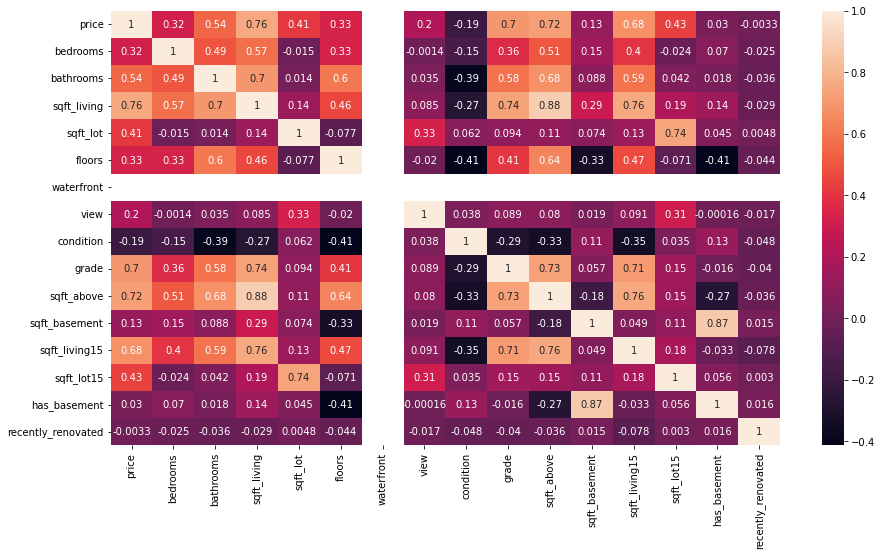

This is : Island


<Figure size 432x288 with 0 Axes>

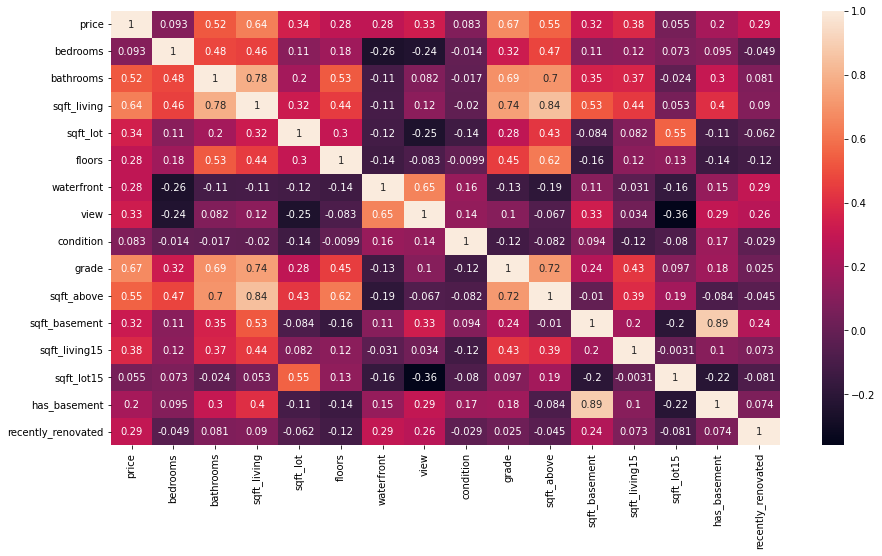

This is : South_of_Seattle


<Figure size 432x288 with 0 Axes>

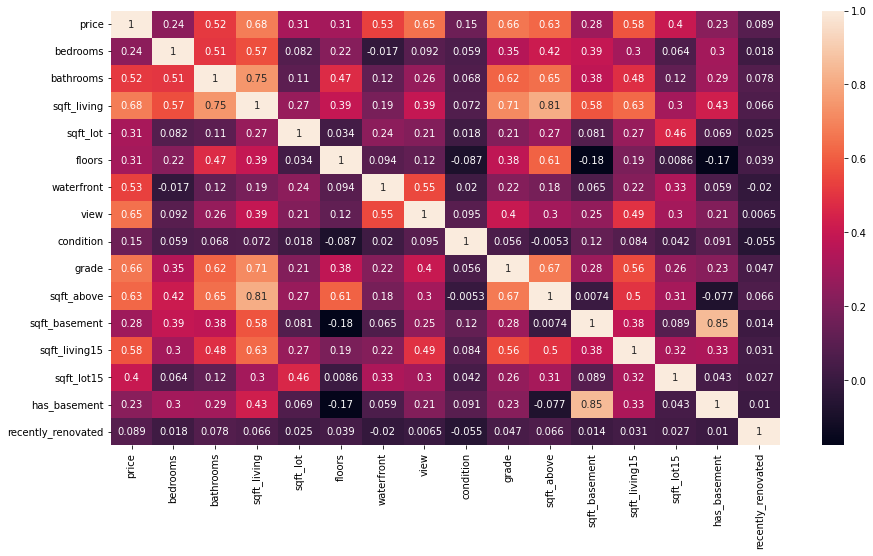

This is : Seattle


<Figure size 432x288 with 0 Axes>

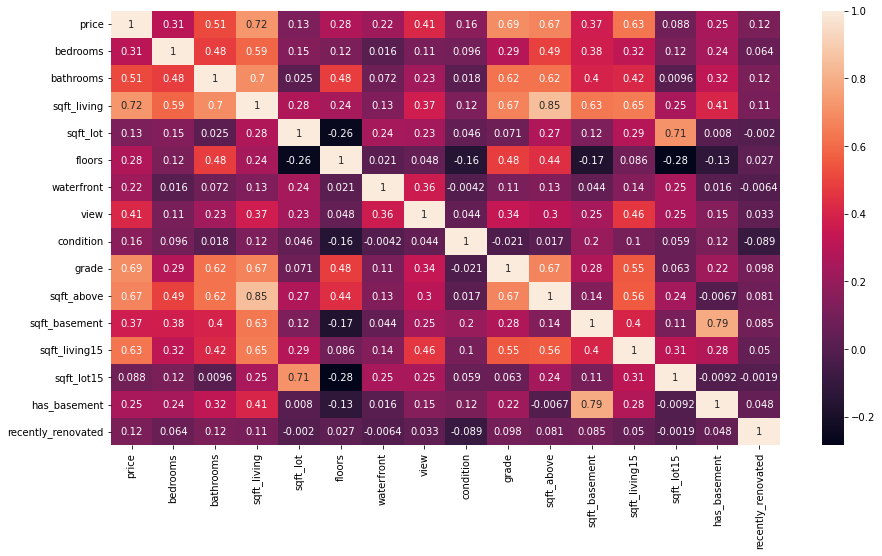

This is : Southeast_of_Seattle


<Figure size 432x288 with 0 Axes>

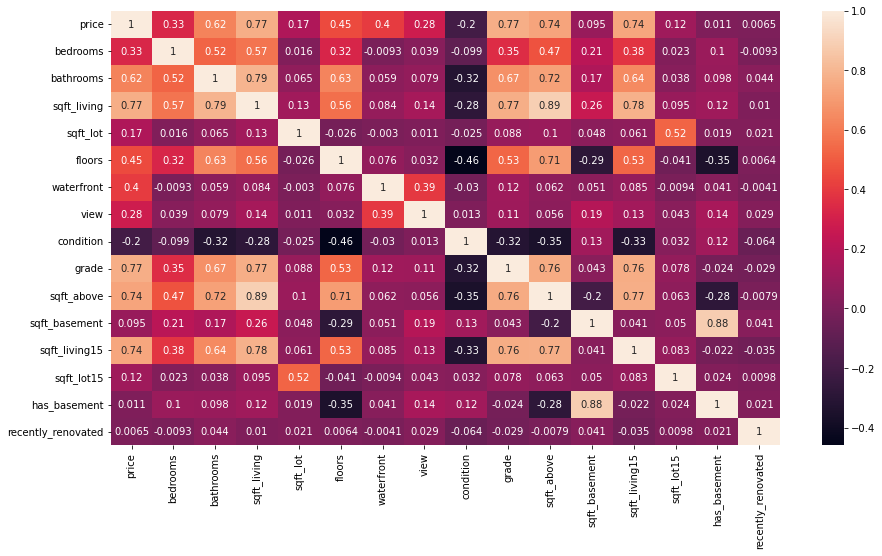

This is : Rich


<Figure size 432x288 with 0 Axes>

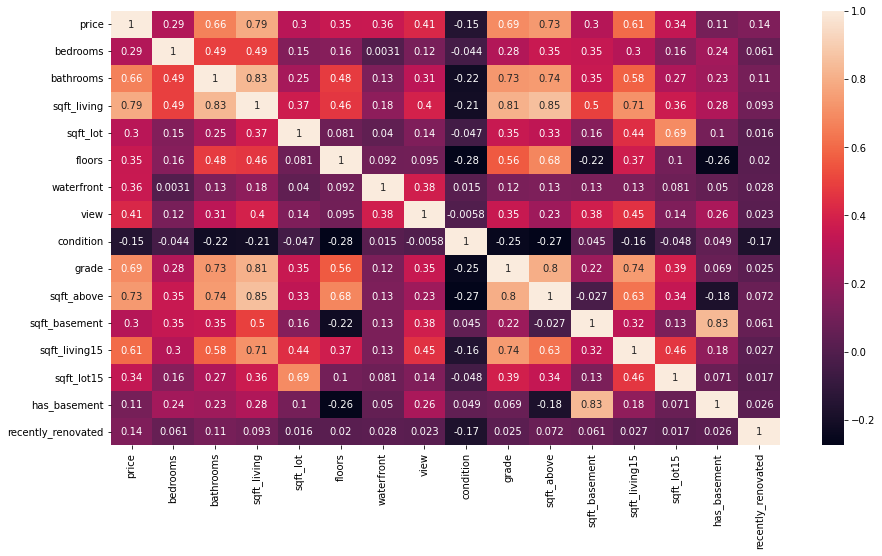

This is : Kirkland


<Figure size 432x288 with 0 Axes>

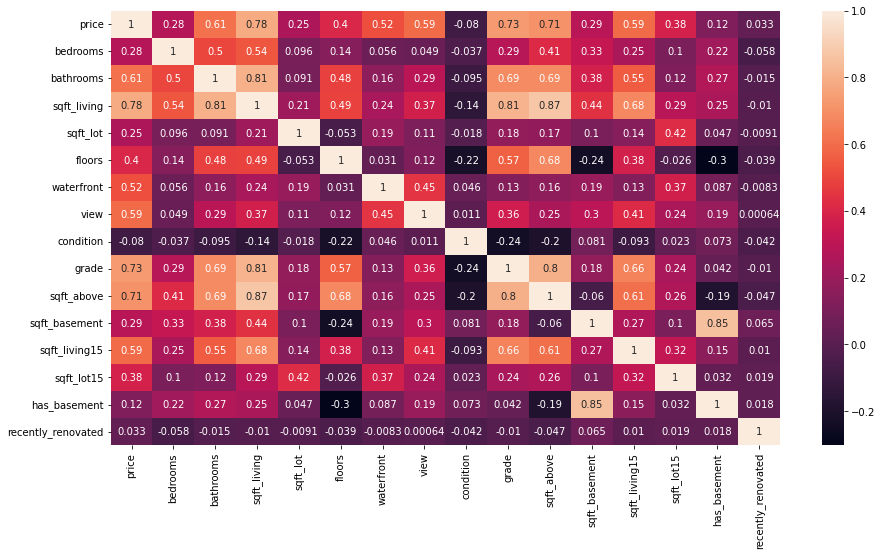

This is : Northeast


<Figure size 432x288 with 0 Axes>

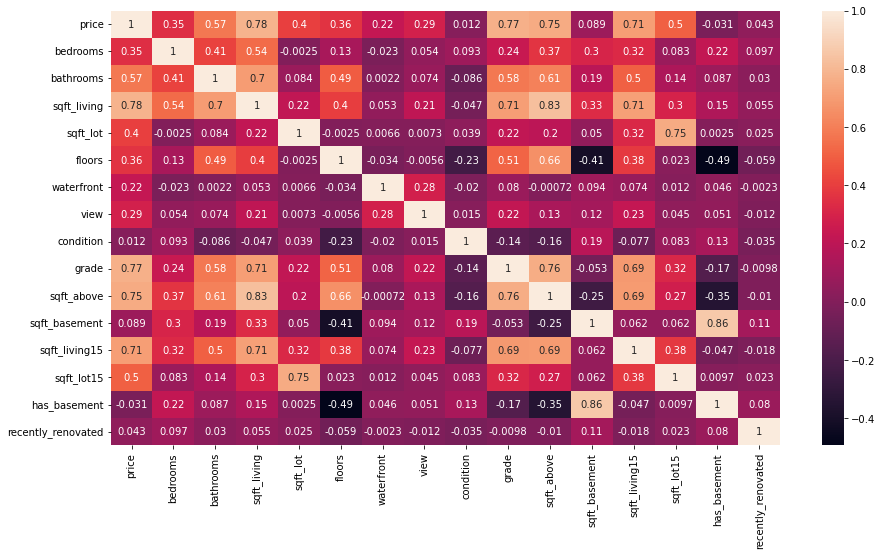

This is : North


<Figure size 432x288 with 0 Axes>

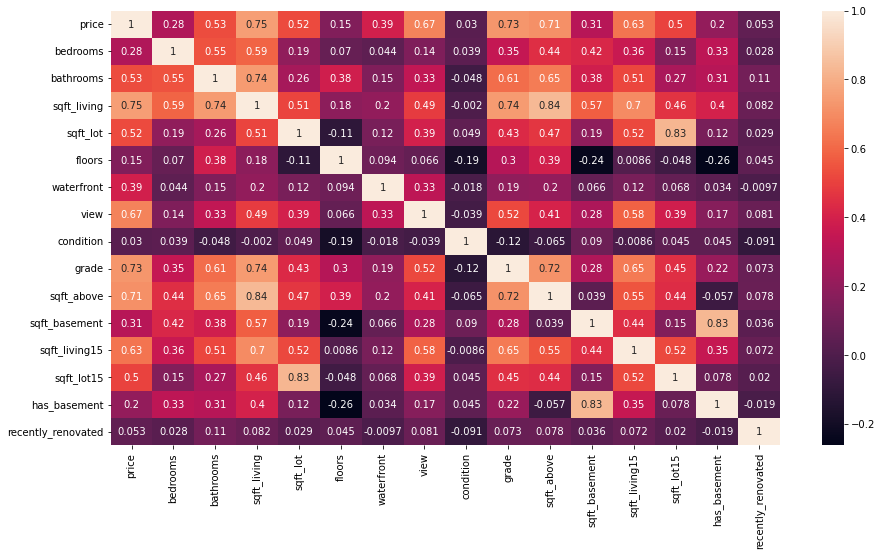

This is : Redmond


<Figure size 432x288 with 0 Axes>

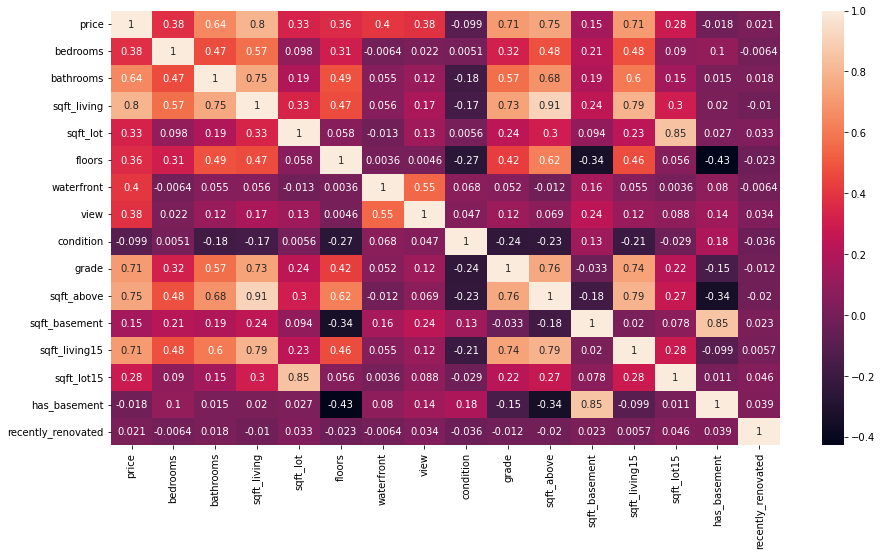

This is : Suburan


<Figure size 432x288 with 0 Axes>

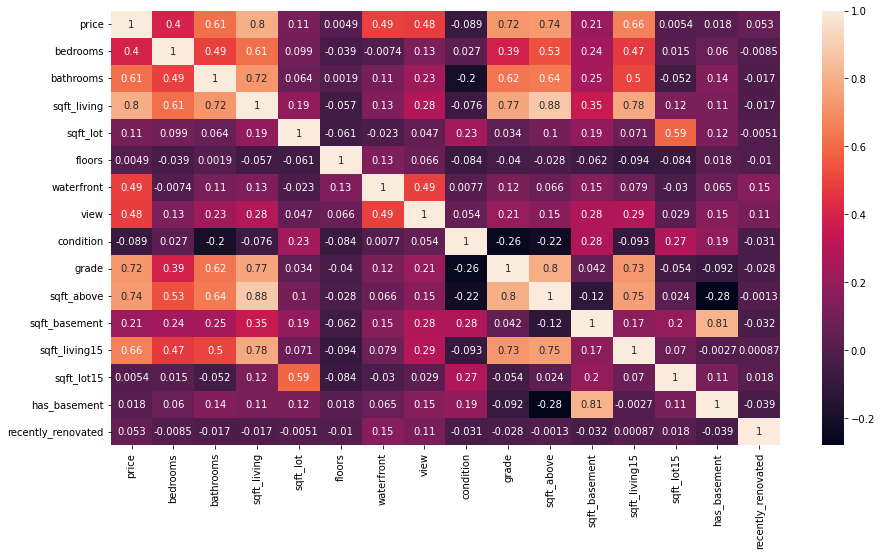

This is : Rural


<Figure size 432x288 with 0 Axes>

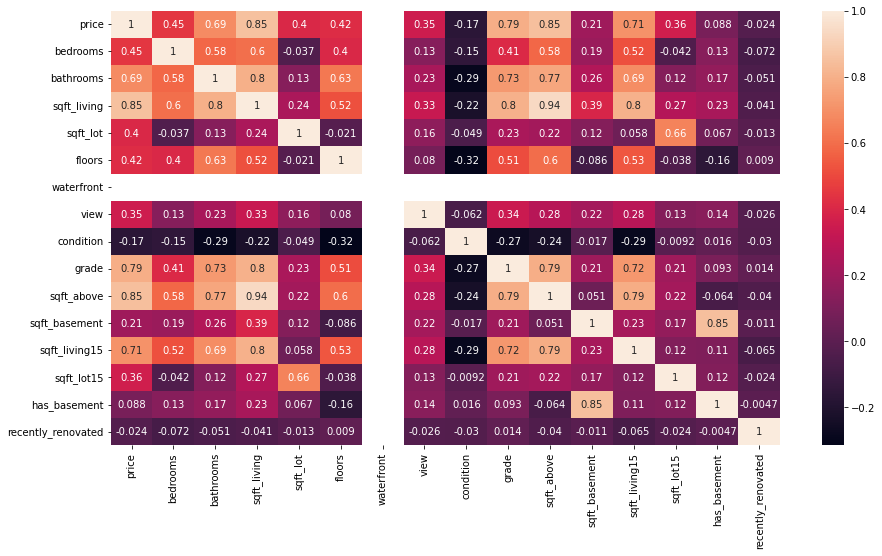

<Figure size 432x288 with 0 Axes>

In [22]:
for i in regions_df.keys():
    corr = regions_df[i].loc[:, outliers].corr()
    fig = plt.subplots(figsize=(15,8))
    print('This is : {}'.format(i))
    sns.heatmap(corr, annot=True)
    plt.show()
    plt.clf()

# Heatmap after outlier treatment

boxplot data for Southwest


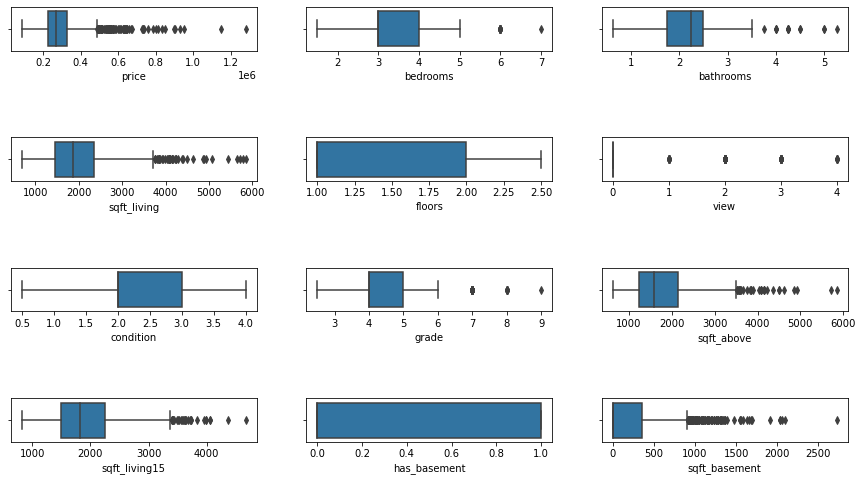

boxplot data for Southeast


<Figure size 432x288 with 0 Axes>

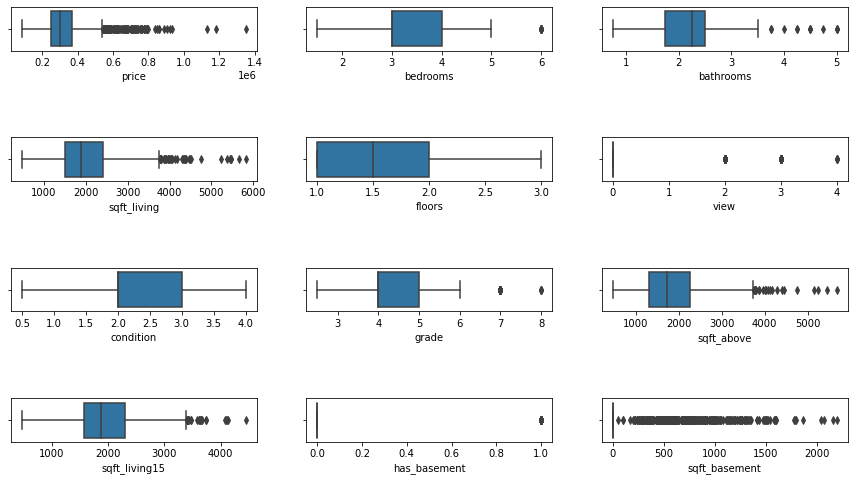

boxplot data for Island


<Figure size 432x288 with 0 Axes>

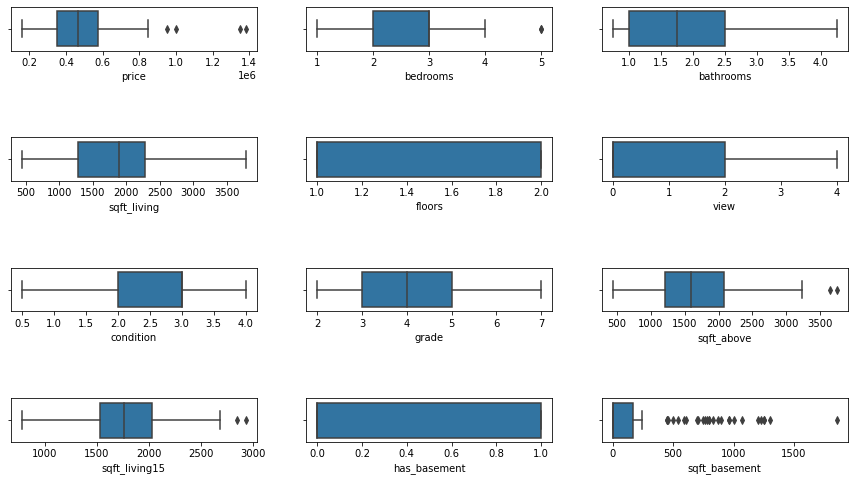

boxplot data for South_of_Seattle


<Figure size 432x288 with 0 Axes>

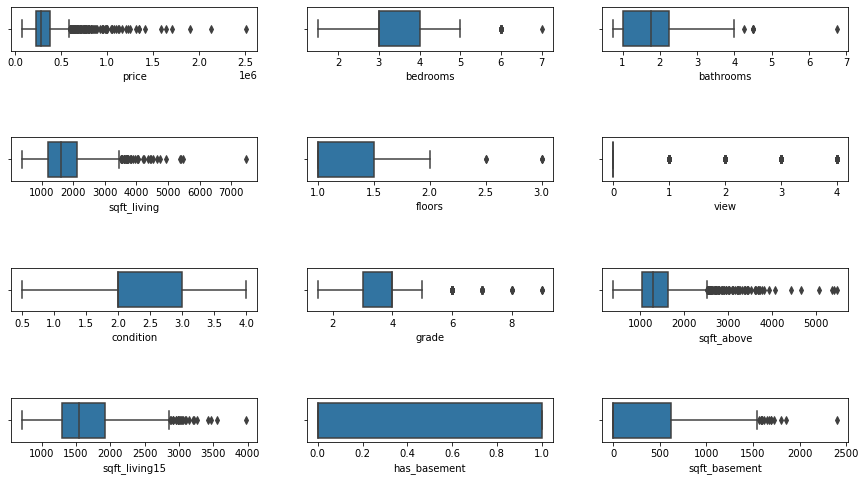

boxplot data for Seattle


<Figure size 432x288 with 0 Axes>

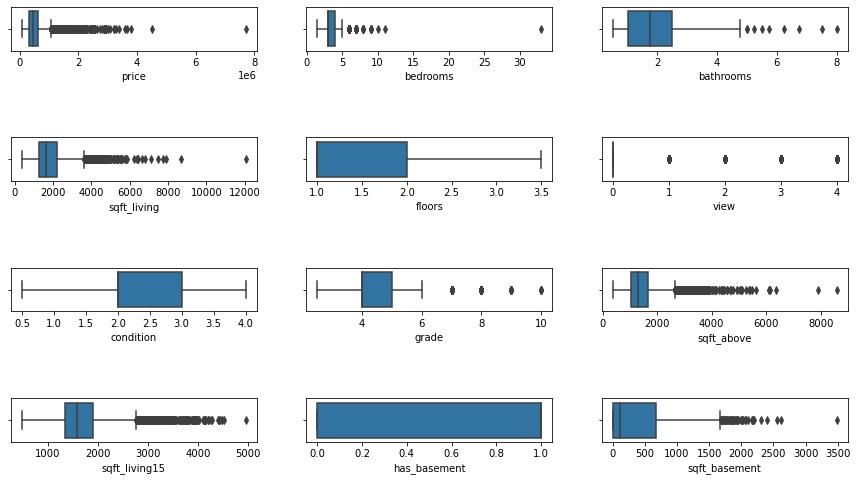

boxplot data for Southeast_of_Seattle


<Figure size 432x288 with 0 Axes>

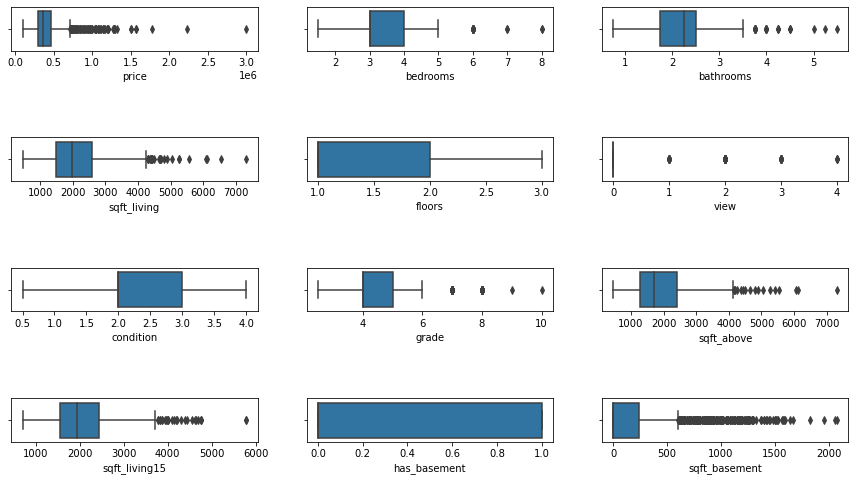

boxplot data for Rich


<Figure size 432x288 with 0 Axes>

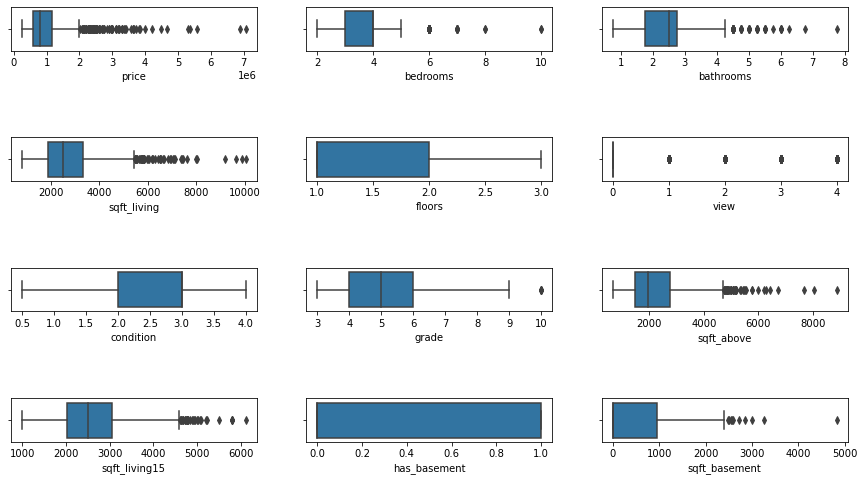

boxplot data for Kirkland


<Figure size 432x288 with 0 Axes>

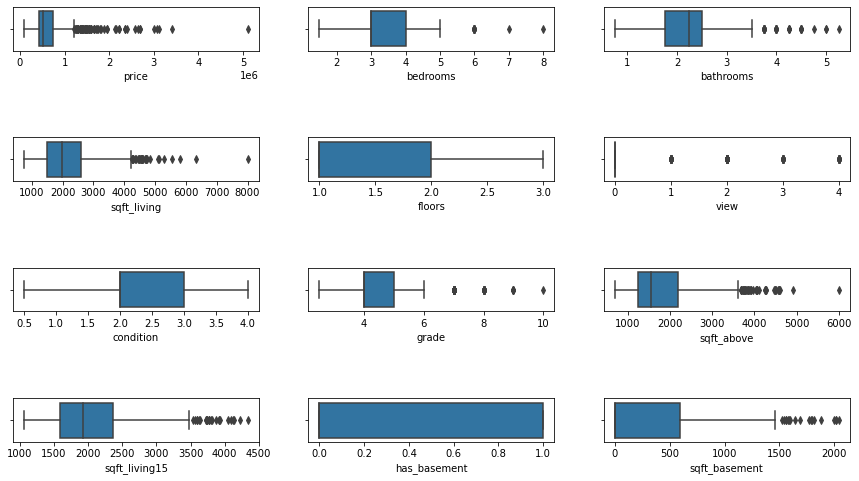

boxplot data for Northeast


<Figure size 432x288 with 0 Axes>

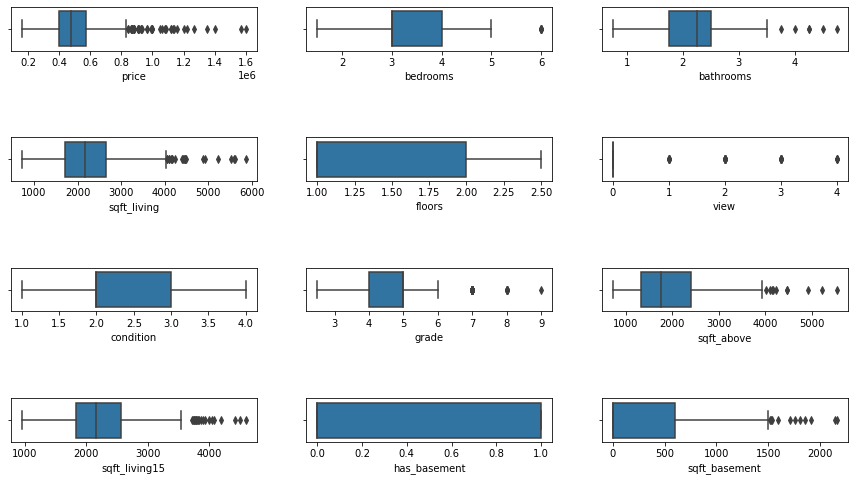

boxplot data for North


<Figure size 432x288 with 0 Axes>

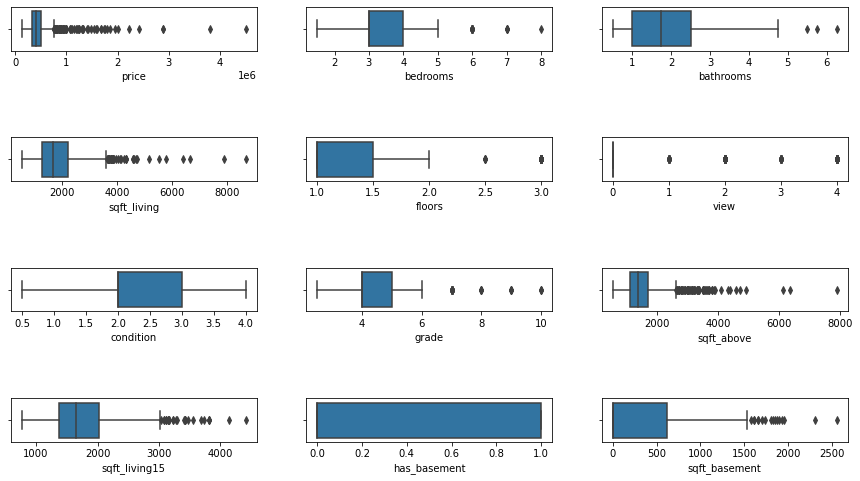

boxplot data for Redmond


<Figure size 432x288 with 0 Axes>

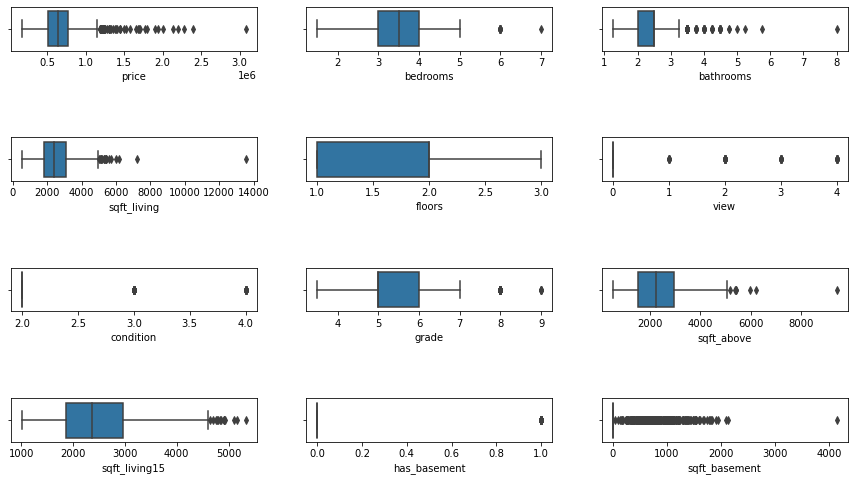

boxplot data for Suburan


<Figure size 432x288 with 0 Axes>

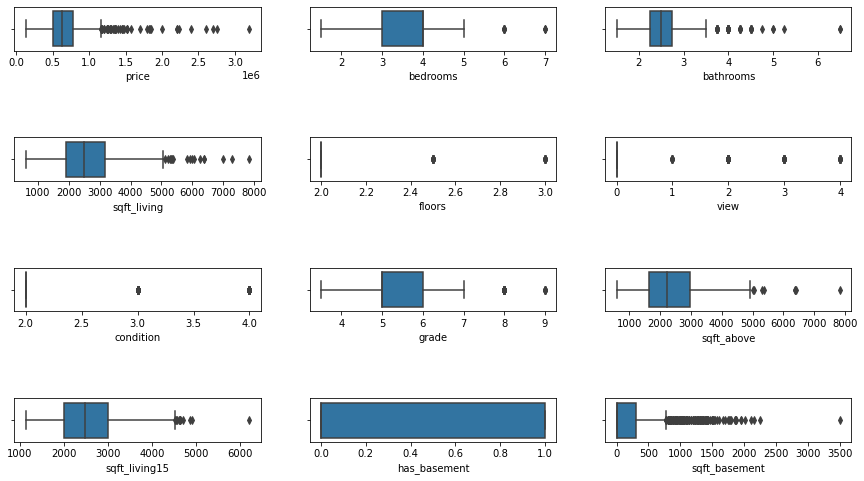

boxplot data for Rural


<Figure size 432x288 with 0 Axes>

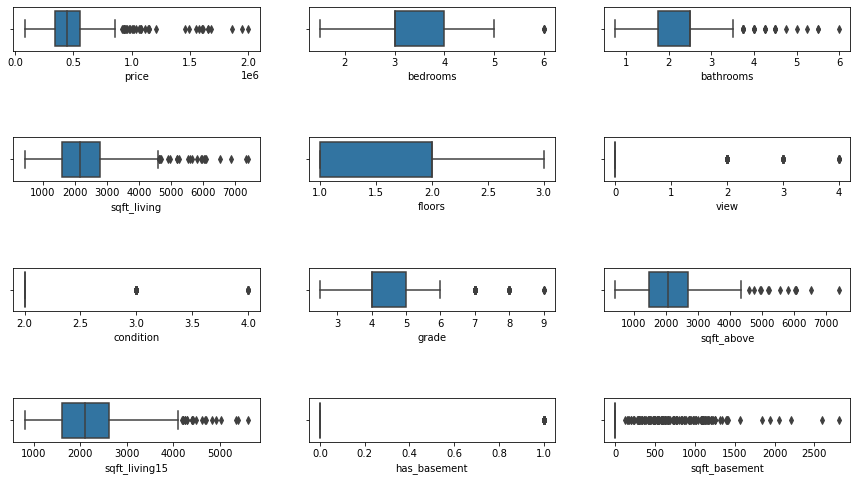

<Figure size 432x288 with 0 Axes>

In [23]:
for i in regions_df.keys():
    print('boxplot data for {}'.format(i))
    
    fig, ax = plt.subplots(figsize=(15,8), nrows=4, ncols=3)
    plt.subplots_adjust(hspace=2)
    
    sns.boxplot(regions_df[i]['price'],data=regions_df[i],ax=ax[0][0])
    sns.boxplot(regions_df[i]['bedrooms'],data=regions_df[i],ax=ax[0][1])
    sns.boxplot(regions_df[i]['bathrooms'],data=regions_df[i],ax=ax[0][2])
    sns.boxplot(regions_df[i]['sqft_living'],data=regions_df[i],ax=ax[1][0])
    sns.boxplot(regions_df[i]['floors'],data=regions_df[i],ax=ax[1][1])
    sns.boxplot(regions_df[i]['view'],data=regions_df[i],ax=ax[1][2])
    sns.boxplot(regions_df[i]['condition'],data=regions_df[i],ax=ax[2][0])
    sns.boxplot(regions_df[i]['grade'],data=regions_df[i],ax=ax[2][1])
    sns.boxplot(regions_df[i]['sqft_above'],data=regions_df[i],ax=ax[2][2])
    sns.boxplot(regions_df[i]['sqft_living15'],data=regions_df[i],ax=ax[3][0])
    sns.boxplot(regions_df[i]['has_basement'],data=regions_df[i],ax=ax[3][1])
    sns.boxplot(regions_df[i]['sqft_basement'],data=regions_df[i],ax=ax[3][2])
    
    plt.show()
    
    plt.clf()
# Boxplot after the outlier treatment

In [24]:
for i in regions_df.keys():
    print('{}: {}'.format(i,len(regions_df[i])))

Southwest: 1690
Southeast: 2123
Island: 117
South_of_Seattle: 1732
Seattle: 8973
Southeast_of_Seattle: 1597
Rich: 1739
Kirkland: 977
Northeast: 751
North: 1194
Redmond: 1418
Suburan: 1092
Rural: 922


In [40]:
# Testing a model with many variables

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

col_selector = ['bedrooms', 'bathrooms', 'sqft_living', 'grade',
               'sqft_above', 'sqft_living15', 'has_basement', 'recently_renovated']

model_dict= {}
error_dict = {}

for i in regions_df.keys():
    
    X = regions_df[i][col_selector]
    y = regions_df[i]['price']
    
    test = None
    
    if len(regions_df[i]) < 300:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
        test = 0.4
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        test = 0.3
    
    lr = LinearRegression()
    
    lr.fit(X_train, y_train)
    rsquared = lr.score(X_train, y_train)
    y_pred = lr.predict(X_test)
    MAE = mean_absolute_error(y_pred, y_test)
    RMSE = np.sqrt(mean_squared_error(y_pred, y_test))


    
    model_dict[i] = [lr, rsquared, test]
    error_dict[i] = [MAE, RMSE]


In [41]:
for i in regions_df.keys():
    print('{}: {}, {}'.format(i,model_dict[i][1], model_dict[i][2]))

Southwest: 0.7150930282432284, 0.3
Southeast: 0.6632100563692387, 0.3
Island: 0.5694776464925853, 0.4
South_of_Seattle: 0.5870938434389117, 0.3
Seattle: 0.6388607313351995, 0.3
Southeast_of_Seattle: 0.6702182385841992, 0.3
Rich: 0.667408337878632, 0.3
Kirkland: 0.6833627284815809, 0.3
Northeast: 0.685046725229527, 0.3
North: 0.6712558011892302, 0.3
Redmond: 0.6906927136745233, 0.3
Suburan: 0.6967660064715078, 0.3
Rural: 0.7792097630506136, 0.3


In [47]:
for i in regions_df.keys():
    print('{}: MAE:{}, RMSE: {}'.format(i, error_dict[i][0], error_dict[i][1]))

Southwest: MAE:38824.8402385505, RMSE: 61139.84834717994
Southeast: MAE:46574.74648442443, RMSE: 69997.51982911197
Island: MAE:93442.48398913082, RMSE: 144722.9870576499
South_of_Seattle: MAE:83290.40665376793, RMSE: 148888.61682094092
Seattle: MAE:140580.75841445074, RMSE: 200752.6105673418
Southeast_of_Seattle: MAE:74810.97173433649, RMSE: 114089.28739601684
Rich: MAE:247618.0860447721, RMSE: 357578.68369128054
Kirkland: MAE:140834.28827098853, RMSE: 256041.46410845866
Northeast: MAE:65906.64936624192, RMSE: 99883.33072594053
North: MAE:98668.17714637947, RMSE: 191052.12095700085
Redmond: MAE:78277.16394918704, RMSE: 131036.21801005087
Suburan: MAE:88201.72087130007, RMSE: 181599.9096808472
Rural: MAE:61982.52546114192, RMSE: 85181.00888333027


In [48]:
# Testing a model with less variables

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

col_selector = ['bedrooms', 'bathrooms', 'sqft_living', 'grade',
               'sqft_above', 'sqft_living15']

model_dict= {}
error_dict = {}

for i in regions_df.keys():
    
    X = regions_df[i][col_selector]
    y = regions_df[i]['price']
    
    test = None
    
    if len(regions_df[i]) < 300:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
        test = 0.4
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        test = 0.3
    
    lr = LinearRegression()
    
    lr.fit(X_train, y_train)
    rsquared = lr.score(X_train, y_train)
    y_pred = lr.predict(X_test)
    MAE = mean_absolute_error(y_pred, y_test)
    RMSE = np.sqrt(mean_squared_error(y_pred, y_test))


    
    model_dict[i] = [lr, rsquared, test]
    error_dict[i] = [MAE, RMSE]

In [49]:
for i in regions_df.keys():
    print('{}: {}, {}'.format(i,model_dict[i][1], model_dict[i][2]))

Southwest: 0.6941574930801018, 0.3
Southeast: 0.6491793537615622, 0.3
Island: 0.5803236044782605, 0.4
South_of_Seattle: 0.5822502740363815, 0.3
Seattle: 0.6394040417717527, 0.3
Southeast_of_Seattle: 0.6785210037983593, 0.3
Rich: 0.6201191716357548, 0.3
Kirkland: 0.66572848855408, 0.3
Northeast: 0.727464231244761, 0.3
North: 0.6862746102562487, 0.3
Redmond: 0.6329793818688318, 0.3
Suburan: 0.701473031802036, 0.3
Rural: 0.7791132831035265, 0.3
